<a href="https://colab.research.google.com/github/MePrince47/App---Gestion-tontine-1-/blob/main/Copie_de_Bienvenue_dans_Colaboratory-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Bienvenue dans Colab !</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Nouveau&#41; Essayez l'API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fonctions as fct

ModuleNotFoundError: No module named 'fonctions'

Si vous connaissez déjà Colab, regardez cette vidéo pour découvrir les tables interactives, l'affichage de l'historique du code exécuté et la palette de commandes.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  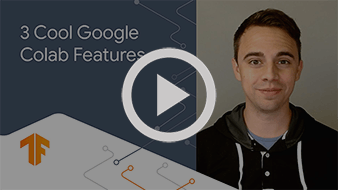
  </a>
</center>

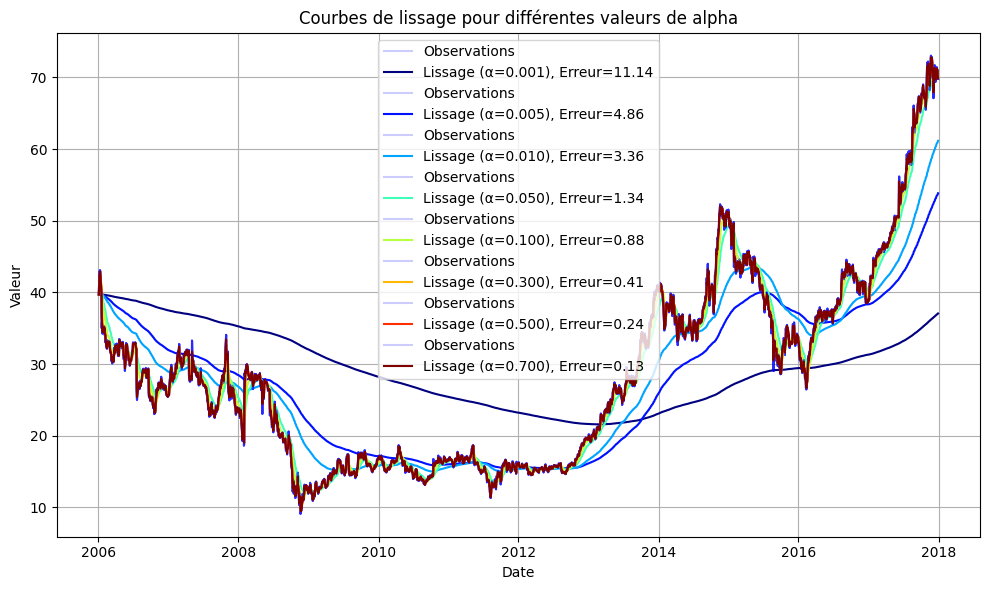

La meilleure approximation (a-hat) est: 0.4713754804548144


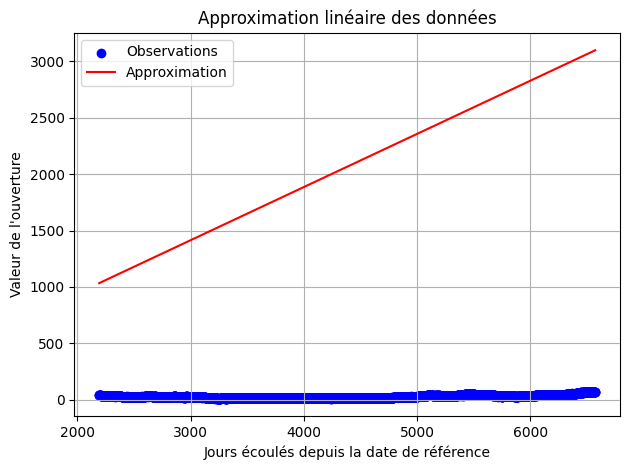

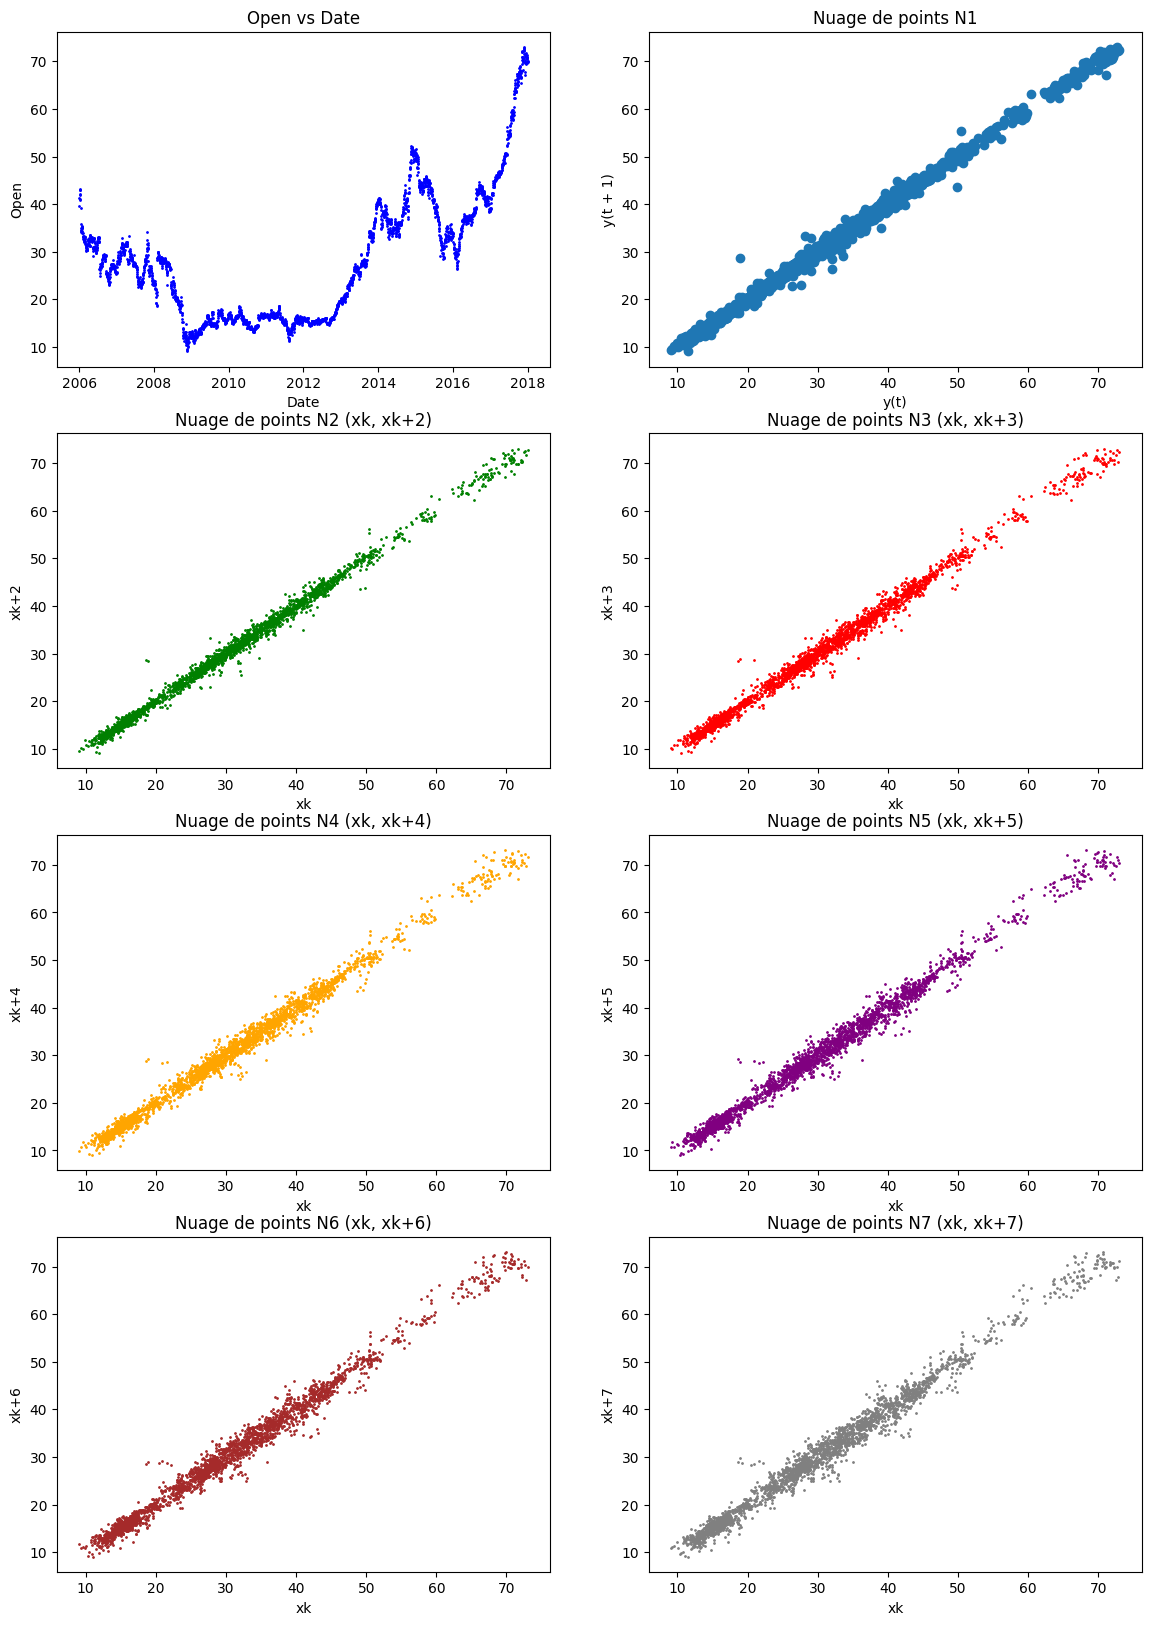

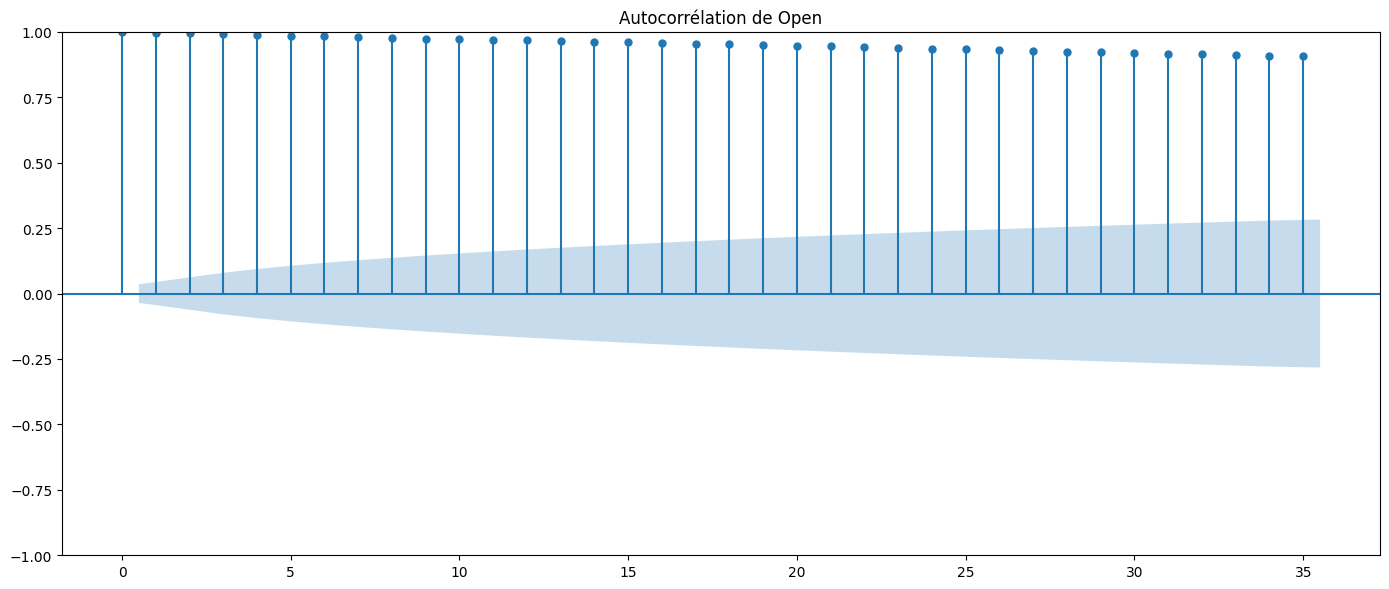

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
# Liste des valeurs de alpha
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7]

# Définir une palette de couleurs
colors = plt.cm.jet(np.linspace(0, 1, len(alphas)))

# Initialiser une figure
plt.figure(figsize=(10, 6))

# Boucle sur chaque valeur de alpha
for alpha, color in zip(alphas, colors):
    # Initialiser la première valeur lissée pour cette valeur de alpha
    L = [data['Open'].iloc[0]]

    # Calculer les valeurs lissées pour les observations suivantes
    for i in range(1, len(data)):
        smoothed = alpha * data['Open'].iloc[i] + (1 - alpha) * L[-1]
        L.append(smoothed)

    # Calculer l'erreur pour cette valeur de alpha
    error = np.mean(np.abs(data['Open'] - L))

    # Tracer les données d'observation
    plt.plot(data['Date'], data['Open'], label='Observations', color='blue', alpha=0.2)

    # Tracer la courbe lissée
    plt.plot(data['Date'], L, label=f'Lissage (α={alpha:.3f}), Erreur={error:.2f}', color=color)

# Ajouter des titres et des légendes
plt.title('Courbes de lissage pour différentes valeurs de alpha')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()













# Convertir les dates en objets datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculer les jours écoulés depuis une date de référence
reference_date = pd.to_datetime('2000-01-01')  # Date de référence (exemple)
data['Days'] = (data['Date'] - reference_date).dt.days

# Extraire les données
x = data['Days']
y = data['Open']

# Calculer la meilleure approximation
def calculate_best_approximation(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    a = (sum_y - b * sum_x) / n

    return a, b

a_hat, b_hat = calculate_best_approximation(x, y)

print("La meilleure approximation (a-hat) est:", a_hat)

# Tracer les données d'observation
plt.scatter(x, y, color='blue', label='Observations')

# Calculer les valeurs y pour la droite d'approximation
y_approx = a_hat * x + b_hat  # Ajouter le terme constant b_hat

# Tracer la droite d'approximation
plt.plot(x, y_approx, color='red', label='Approximation')

# Ajouter des titres et des légendes
plt.title('Approximation linéaire des données')
plt.xlabel('Jours écoulés depuis la date de référence')
plt.ylabel('Valeur de l\'ouverture')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()

















# Création des nuages de points et des graphiques d'autocorrélation pour différentes paires d'attributs
plt.figure(figsize=(14, 20))

# Courbe de points pour 'Open'
plt.subplot(4, 2, 1)
plt.scatter(data['Date'], data['Open'], color='blue', s=1)  # Ajuster la taille des points ici
plt.title('Open vs Date')
plt.xlabel('Date')
plt.ylabel('Open')

# Nuage de points N1 (xk, xk+1)
plt.subplot(4, 2, 2)
lag_plot(data['Open'], ax=plt.gca())
plt.title('Nuage de points N1')

# Nuage de points N2 (xk, xk+2)
plt.subplot(4, 2, 3)
plt.scatter(data['Open'].iloc[:-2], data['Open'].iloc[2:], color='green', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N2 (xk, xk+2)')
plt.xlabel('xk')
plt.ylabel('xk+2')

# Nuage de points N3 (xk, xk+3)
plt.subplot(4, 2, 4)
plt.scatter(data['Open'].iloc[:-3], data['Open'].iloc[3:], color='red', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N3 (xk, xk+3)')
plt.xlabel('xk')
plt.ylabel('xk+3')

# Nuage de points N4 (xk, xk+4)
plt.subplot(4, 2, 5)
plt.scatter(data['Open'].iloc[:-4], data['Open'].iloc[4:], color='orange', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N4 (xk, xk+4)')
plt.xlabel('xk')
plt.ylabel('xk+4')

# Nuage de points N5 (xk, xk+5)
plt.subplot(4, 2, 6)
plt.scatter(data['Open'].iloc[:-5], data['Open'].iloc[5:], color='purple', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N5 (xk, xk+5)')
plt.xlabel('xk')
plt.ylabel('xk+5')

# Nuage de points N6 (xk, xk+6)
plt.subplot(4, 2, 7)
plt.scatter(data['Open'].iloc[:-6], data['Open'].iloc[6:], color='brown', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N6 (xk, xk+6)')
plt.xlabel('xk')
plt.ylabel('xk+6')

# Nuage de points N7 (xk, xk+7)
plt.subplot(4, 2, 8)
plt.scatter(data['Open'].iloc[:-7], data['Open'].iloc[7:], color='gray', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N7 (xk, xk+7)')
plt.xlabel('xk')
plt.ylabel('xk+7')

# Affichage de la courbe d'autocorrélation pour 'Open'
plt.figure(figsize=(14, 6))
plt.subplot(1, 1, 1)
plot_acf(data['Open'], ax=plt.gca(), alpha=0.05)
plt.title('Autocorrélation de Open')

plt.tight_layout()
plt.show()


<div class="markdown-google-sans">
  <h2>Qu'est-ce que Colab ?</h2>
</div>

Colab &#40;ou "Colaboratory"&#41; vous permet d'écrire et d'exécuter du code Python dans votre navigateur avec
- Aucune configuration requise
- Accès sans frais aux GPU
- Partage facile

Que vous soyez <strong>étudiant</strong>, <strong>data scientist</strong> ou <strong>chercheur en IA</strong>, Colab peut vous simplifier la tâche. Regardez la <a href="https://www.youtube.com/watch?v=inN8seMm7UI">présentation de Colab</a> pour en savoir plus ou commencez tout de suite.

<div class="markdown-google-sans">

## <strong>Premiers pas</strong>
</div>

Le document que vous consultez n'est pas une page Web statique, mais un environnement interactif appelé <strong>notebook Colab</strong>, qui vous permet d'écrire et d'exécuter du code.

Voici par exemple une <strong>cellule de code</strong> avec un bref script en Python qui calcule une valeur, l'enregistre dans une variable et imprime le résultat :

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Pour exécuter le code dans la cellule ci-dessus, sélectionnez-le en cliquant dessus, puis cliquez sur le bouton de lecture à gauche du code ou utilisez le raccourci clavier Commande/Ctrl+Entrée. Pour modifier le code, cliquez simplement sur la cellule.

Les variables que vous définissez dans une cellule peuvent être utilisées par la suite dans d'autres cellules :

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Les notebooks Colab vous permettent d'utiliser, dans un même document, du <strong>code exécutable</strong>, du <strong>texte enrichi</strong>, des <strong>images</strong>, du code <strong>HTML</strong>, du code <strong>LaTeX</strong> et bien plus. Lorsque vous créez des notebooks Colab, ils sont enregistrés dans votre compte Google Drive. Vous pouvez facilement les partager avec vos collaborateurs ou vos amis, qui peuvent alors y apporter des commentaires ou même les modifier. Pour en savoir plus, consultez la page <a href="/notebooks/basic_features_overview.ipynb">Présentation de Colaboratory</a>. Pour créer un notebook Colab, utilisez le menu "Fichier" ci-dessus ou le lien <a href="http://colab.research.google.com#create=true">Créer un notebook Colab</a>.

Les notebooks Colab sont des notebooks Jupyter hébergés par Colab. Pour en savoir plus sur le projet Jupyter, consultez le site Web <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Science des données
</div>

Colab vous permet de tirer pleinement parti des bibliothèques populaires Python pour analyser et visualiser des données. La cellule de code ci-dessous utilise <strong>numpy</strong> pour générer des données aléatoires et <strong>matplotlib</strong> pour les visualiser. Pour modifier le code, cliquez simplement sur la cellule.

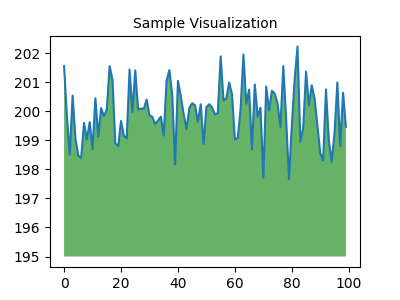

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Vous pouvez importer vos propres données dans les notebooks Colab depuis votre compte Google Drive, y compris depuis des feuilles de calcul, ainsi que depuis GitHub et de nombreuses autres sources. Pour en savoir plus sur l'importation de données et l'utilisation de Colab dans le domaine de la science des données, consultez les liens ci-dessous dans la section <a href="#working-with-data">Utiliser les données</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Colab vous permet d'importer un ensemble de données d'images, d'entraîner un classificateur d'images sur cet ensemble et d'évaluer le modèle, tout cela avec <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">quelques lignes de code</a>. Les notebooks Colab exécutent ce code sur les serveurs cloud de Google. Vous avez donc à votre disposition toute la puissance du matériel Google, y compris les <a href="#using-accelerated-hardware">GPU et TPU</a>, quelle que soit la puissance de votre ordinateur. Vous n'avez besoin que d'un navigateur.

Colab est très largement utilisé par la communauté du machine learning, par exemple dans les applications suivantes :
- Premiers pas avec TensorFlow
- Développement et entraînement de réseaux de neurones
- Expérimentation avec les TPU
- Dissémination de la recherche en IA
- Création de tutoriels

Pour voir comment les notebooks Colab sont utilisés dans des applications de machine learning, reportez-vous aux <a href="#machine-learning-examples">exemples de machine learning</a> ci-dessous.

<div class="markdown-google-sans">

## Autres ressources

### Utiliser les notebooks dans Colab

</div>

- [Présentation de Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide de Markdown](/notebooks/markdown_guide.ipynb)
- [Importer des bibliothèques et installer des dépendances](/notebooks/snippets/importing_libraries.ipynb)
- [Enregistrer et charger des notebooks dans GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulaires interactifs](/notebooks/forms.ipynb)
- [Widgets interactifs](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Utiliser les données
</div>

- [Chargement de données : Drive, Sheets et Google Cloud Storage](/notebooks/io.ipynb)
- [Graphiques : visualiser les données](/notebooks/charts.ipynb)
- [Premiers pas avec BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Cours d'initiation au Machine Learning

<div>

Vous trouverez ci-dessous quelques-uns des notebooks de la formation Google en ligne sur le machine learning. Consultez la <a href="https://developers.google.com/machine-learning/crash-course/">formation complète en ligne</a> pour en savoir plus.
- [Présentation du DataFrame pandas](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Régression linéaire avec tf.keras et des données synthétiques](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Utiliser le matériel accéléré
</div>

- [TensorFlow avec des GPU](/notebooks/gpu.ipynb)
- [TensorFlow avec des TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Échange de voix avec NeMo</a> : utilisez le kit Nvidia NeMo pour l'IA conversationnelle afin d'échanger une voix dans un fragment audio contre une voix générée par ordinateur.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Recyclage d'un classificateur d'images</a> : construisez un modèle Keras sur un classificateur d'images pré-entraîné pour faire la distinction entre différentes fleurs.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classification de texte</a> : classez des avis sur des films provenant de la base de données IMDB comme <em>positifs</em> ou <em>négatifs</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfert de style</a> : utilisez le deep learning pour transférer un style d'une image à une autre.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Questions/Réponses sur l'encodeur de phrases universel multilingue</a> : utilisez un modèle de machine learning afin de répondre aux questions issues de l'ensemble de données SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolation vidéo</a> : prédisez ce qui s'est passé entre la première et la dernière image d'une vidéo.
